In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Define the path to your file based on the folder structure you've shown
file_path = '/content/drive/My Drive/SHIVAM_2246032/iris.data'

In [ ]:
# Read the dataset into a DataFrame
import pandas as pd
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris_df = pd.read_csv(file_path, header=None, names=column_names)



In [ ]:
# Display the first few rows of your dataframe
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = iris_df.iloc[:, :-1]  # Features
y = iris_df.iloc[:, -1]  # Target variable

# Splitting dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Model evaluation
print(f'Accuracy: {accuracy_score(y_test, y_pred)*100}%')
print(classification_report(y_test, y_pred))


Accuracy: 100.0%
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



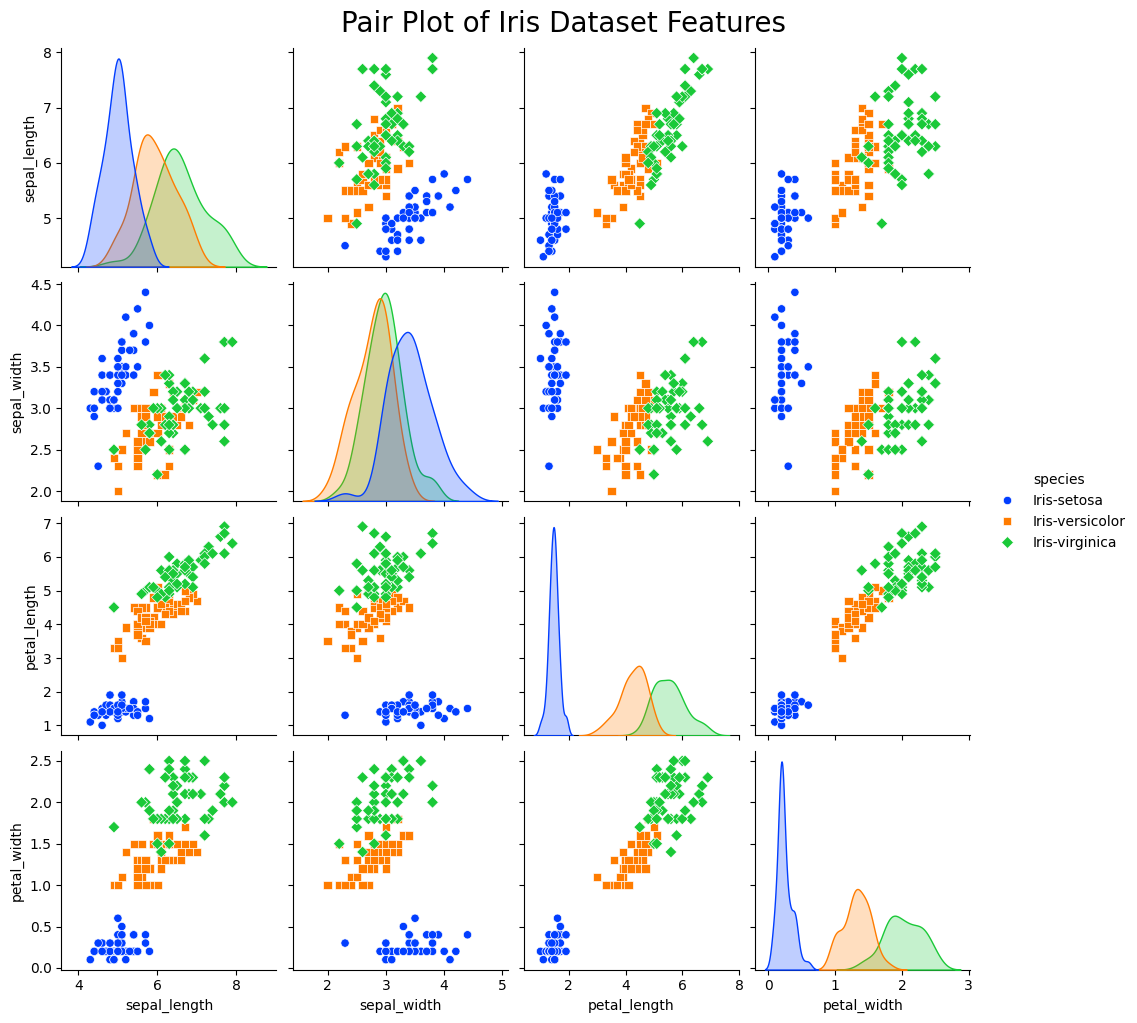

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Pairplot of the Iris dataset
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"], palette='bright')
plt.suptitle('Pair Plot of Iris Dataset Features', size=20, y=1.02)
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Labels for the species
species = iris_df['species'].unique()

# Make the confusion matrix more readable
conf_mat_df = pd.DataFrame(conf_mat, index=species, columns=species)


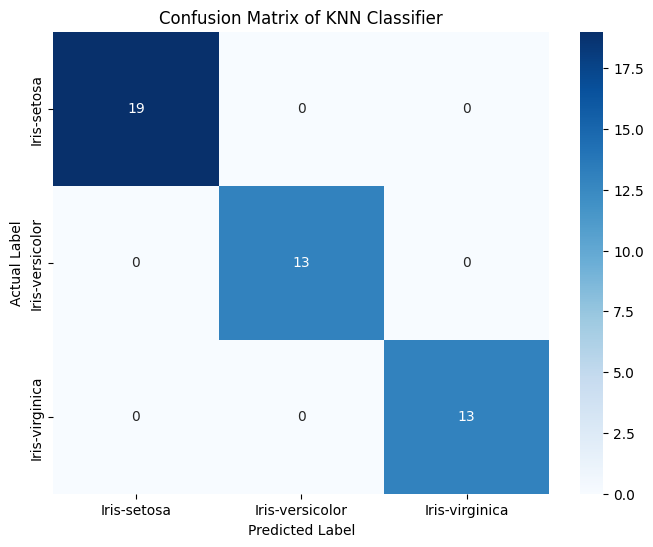

In [ ]:
# Heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix of KNN Classifier')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()
